<a href="https://colab.research.google.com/github/weichihli/Course496_activities/blob/main/DuPont%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import requests
import pandas as pd
myAPIKey = 'ff8b9d896566514f9e7c34b647beddcd'
stock = 'FB'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()


In [31]:
print (balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'FB', 'reportedCurrency': 'USD', 'cik': '0001326801', 'fillingDate': '2022-02-03', 'acceptedDate': '2022-02-02 21:11:04', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 16601000000, 'shortTermInvestments': 31397000000, 'cashAndShortTermInvestments': 47998000000, 'netReceivables': 14039000000, 'inventory': 0.0, 'otherCurrentAssets': 4629000000, 'totalCurrentAssets': 66666000000, 'propertyPlantEquipmentNet': 69964000000, 'goodwill': 19197000000, 'intangibleAssets': 634000000, 'goodwillAndIntangibleAssets': 19831000000, 'longTermInvestments': 6775000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2751000000, 'totalNonCurrentAssets': 99321000000, 'otherAssets': 0.0, 'totalAssets': 165987000000, 'accountPayables': 4083000000, 'shortTermDebt': 1127000000, 'taxPayables': 1256000000, 'deferredRevenue': 561000000, 'otherCurrentLiabilities': 15364000000, 'totalCurrentLiabilities': 21135000000, 'longTermDebt': 12746000000, 'deferredRevenueNonCu

In [44]:
twoYearsBalanceStatement = balanceStatements[:5]
twoYearsIncomeStatement = incomeStatements[:5]

In [45]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
date = []
for i in range (0,5):
  date.append(twoYearsBalanceStatement[i]['date'])
  profitabilityValue=twoYearsIncomeStatement[i]['netIncome']/twoYearsIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearsIncomeStatement[i]['revenue']/twoYearsBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=twoYearsBalanceStatement[i]['totalAssets']/twoYearsBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [34]:
print(returnOnEquity)

[0.31526517669103693, 0.22718840127835369]


In [46]:
df = pd.DataFrame(columns=['date', 'profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])

In [47]:
df['date']= date
df['profitability'] = profitability
df['assetTurnOver'] = assetTurnOver
df['capitalStructure'] = capitalStructure
df['returnOnEquity'] = returnOnEquity

print(df)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-12-31       0.333845       0.710471          1.329183        0.315265
1  2020-12-31       0.339045       0.539588          1.241843        0.227188
2  2019-12-31       0.261468       0.530058          1.319849        0.182922
3  2018-12-31       0.396003       0.573674          1.156989        0.262841
4  2017-12-31       0.391951       0.480964          1.136885        0.214319


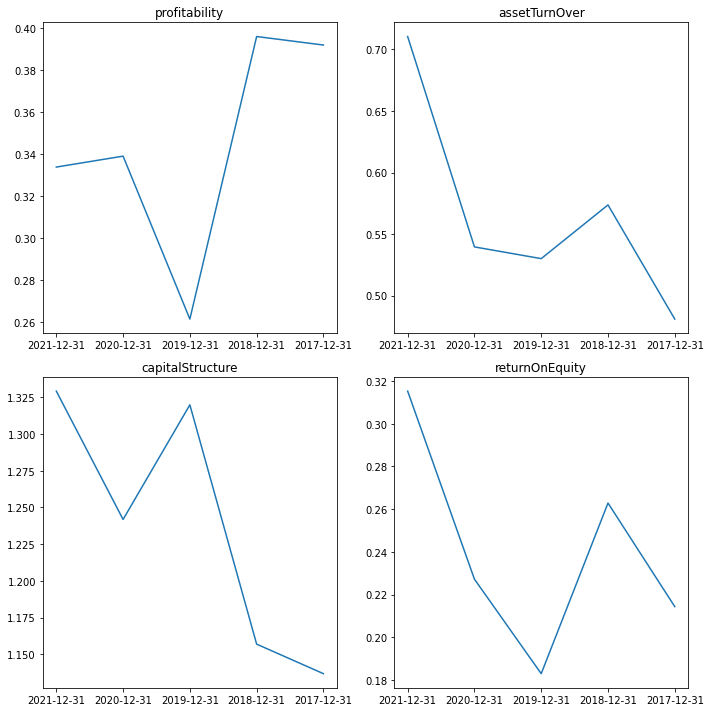

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(10,10))
x = df['date']

values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x,df[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()